# Worldwide soybean production

Our objective is to understand what countries are the main producers of soybeans.
Our aim is to select the top main producers to provide a statistical analysis of its production of soybeans on the futures prices

### Dataset source:

[Foreign Agricultural Service (FAS)](https://apps.fas.usda.gov/psdonline/app/index.html#/app/advQuery)


[Statista Data for the US Production](https://www.statista.com/statistics/192058/production-of-soybeans-for-beans-in-the-us-since-2000/)

## imports utilizados no projeto

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Production Data Overview

In [2]:
# Download the dataset
# Production = 1000MT

df_food_balance = pd.read_csv('../raw_data/FAOSTAT_balance_food_v2_3-21-2022.csv')
df_producers_price = pd.read_csv('../raw_data/FAOSTAT_data_3-21-2022.csv')

In [3]:
df_food_balance.shape, df_producers_price.shape

((28320, 14), (1371, 16))

In [4]:
df_food_balance.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value', 'Flag',
       'Flag Description'],
      dtype='object')

In [5]:
df_food_balance.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBSH,"Food Balances (-2013, old methodology and popu...",3,Albania,5511,Production,2555,Soyabeans,1961,1961,1000 tonnes,0,S,Standardized data
1,FBSH,"Food Balances (-2013, old methodology and popu...",3,Albania,5511,Production,2555,Soyabeans,1962,1962,1000 tonnes,0,S,Standardized data
2,FBSH,"Food Balances (-2013, old methodology and popu...",3,Albania,5511,Production,2555,Soyabeans,1963,1963,1000 tonnes,0,S,Standardized data
3,FBSH,"Food Balances (-2013, old methodology and popu...",3,Albania,5511,Production,2555,Soyabeans,1964,1964,1000 tonnes,0,S,Standardized data
4,FBSH,"Food Balances (-2013, old methodology and popu...",3,Albania,5511,Production,2555,Soyabeans,1965,1965,1000 tonnes,0,S,Standardized data


In [6]:
df_producers_price.columns

Index(['Domain Code', 'Domain', 'Area Code (FAO)', 'Area', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Months Code',
       'Months', 'Unit', 'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [7]:
df_producers_price.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),236,Soybeans,1996,1996,7021,Annual value,USD,478,NaN,Official data
1,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),236,Soybeans,1997,1997,7021,Annual value,USD,336,NaN,Official data
2,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),236,Soybeans,1998,1998,7021,Annual value,USD,332,NaN,Official data
3,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),236,Soybeans,1999,1999,7021,Annual value,USD,436,NaN,Official data
4,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),236,Soybeans,2000,2000,7021,Annual value,USD,487,NaN,Official data


In [8]:
df_producers_price.drop(columns = ["Months Code", 'Months'], inplace= True)

In [9]:
df_producers_price.rename(columns={'Area Code (FAO)': "Area Code"}, inplace= True)

In [10]:
df_stock = pd.read_csv("../raw_data/FAOSTAT_stock_3-21-2022.csv")
df_stock.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,SCL,Supply Utilization Accounts,2,Afghanistan,5071,Stock Variation,141,Soybeans,2015,2015,tonnes,NaN,NaN,Official data
1,SCL,Supply Utilization Accounts,2,Afghanistan,5071,Stock Variation,141,Soybeans,2017,2017,tonnes,NaN,NaN,Official data
2,SCL,Supply Utilization Accounts,3,Albania,5113,Opening stocks,141,Soybeans,2010,2010,tonnes,238.0,F,FAO estimate
3,SCL,Supply Utilization Accounts,3,Albania,5113,Opening stocks,141,Soybeans,2011,2011,tonnes,235.0,F,FAO estimate
4,SCL,Supply Utilization Accounts,3,Albania,5113,Opening stocks,141,Soybeans,2012,2012,tonnes,205.0,F,FAO estimate


In [11]:
df_stock["Element"].unique()

array(['Stock Variation', 'Opening stocks'], dtype=object)

In [12]:
df_stock["Unit"].unique()

array(['tonnes'], dtype=object)

In [13]:
df_stock.rename(columns={'Area Code (FAO)': "Area Code", "Item Code (CPC)": "Item Code"}, inplace= True)

In [14]:
df_producers_price.columns==df_food_balance.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [15]:
df_producers_price.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value', 'Flag',
       'Flag Description'],
      dtype='object')

In [16]:
df_stock.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value', 'Flag',
       'Flag Description'],
      dtype='object')

In [17]:
df_producers_price.columns == df_stock.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [18]:
df = df_producers_price.append(df_food_balance)

/var/folders/s2/rxgrts2d0x3cngcs6yc5fmr40000gn/T/ipykernel_29004/381210299.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_producers_price.append(df_food_balance)


In [19]:
df = df.append(df_stock)

/var/folders/s2/rxgrts2d0x3cngcs6yc5fmr40000gn/T/ipykernel_29004/2580680532.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_stock)


In [20]:
df.head(20)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),236,Soybeans,1996,1996,USD,478.0,NaN,Official data
1,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),236,Soybeans,1997,1997,USD,336.0,NaN,Official data
2,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),236,Soybeans,1998,1998,USD,332.0,NaN,Official data
3,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),236,Soybeans,1999,1999,USD,436.0,NaN,Official data
4,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),236,Soybeans,2000,2000,USD,487.0,NaN,Official data
5,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),236,Soybeans,2001,2001,USD,486.0,NaN,Official data
6,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),236,Soybeans,2002,2002,USD,499.0,NaN,Official data
7,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),236,Soybeans,2003,2003,USD,574.0,NaN,Official data
8,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),236,Soybeans,2004,2004,USD,681.0,NaN,Official data
9,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),236,Soybeans,2005,2005,USD,701.0,NaN,Official data


In [21]:
#break

In [22]:
df_merged = df_stock.merge(df_producers_price, on = ["Year", "Area"])[["Unit_x", "Unit_y", "Area", "Year", "Value_x", "Value_y"]]

In [23]:
df_merged

,Unit_x,Unit_y,Area,Year,Value_x,Value_y
0,tonnes,USD,Albania,2010,238.0,673
1,tonnes,USD,Albania,2010,-3.0,673
2,tonnes,USD,Albania,2011,235.0,743
3,tonnes,USD,Albania,2011,-29.0,743
4,tonnes,USD,Albania,2012,205.0,693
...,...,...,...,...,...,...
893,tonnes,USD,Zimbabwe,2016,-5029.0,540
894,tonnes,USD,Zimbabwe,2017,0.0,540
895,tonnes,USD,Zimbabwe,2017,12723.0,540
896,tonnes,USD,Zimbabwe,2018,12723.0,780


##### Fazer uns graficos legais 
*1 Desenhar o front end

*2 Grafico de mapa e de barra /n

Pesquisa por pais e producao (iterativo!!!)

Geomap! Grafico

Evolucao por ano: producao/consumo/stock



In [24]:
df_merged.corr()

,Year,Value_x,Value_y
Year,1.000000,0.002441,-0.133735
Value_x,0.002441,1.000000,-0.046685
Value_y,-0.133735,-0.046685,1.000000


In [25]:
df = df[["Area", "Element", "Year", "Value", "Unit"]]
df.tail()

,Area,Element,Year,Value,Unit
3200,Zimbabwe,Stock Variation,2015,-12971.0,tonnes
3201,Zimbabwe,Stock Variation,2016,-5029.0,tonnes
3202,Zimbabwe,Stock Variation,2017,12723.0,tonnes
3203,Zimbabwe,Stock Variation,2018,8471.0,tonnes
3204,Zimbabwe,Stock Variation,2019,-1500.0,tonnes


In [26]:
df.shape

(32896, 5)

In [27]:
df_pivot = df.pivot_table(index = ["Year", "Area"], columns = "Element", values = 'Value')

In [28]:
df_pivot.head(20)

Element                                Feed  Food  Losses  Opening stocks  \
Year Area                                                                   
1961 Albania                            NaN   0.0     0.0             NaN   
     Algeria                            0.0   0.0     NaN             NaN   
     Angola                             NaN   0.0     NaN             NaN   
     Antigua and Barbuda                NaN   0.0     NaN             NaN   
     Argentina                          0.0   0.0     0.0             NaN   
     Australia                          0.0   0.0     0.0             NaN   
     Austria                            0.0   0.0     NaN             NaN   
     Bahamas                            NaN   0.0     NaN             NaN   
     Bangladesh                         NaN   0.0     0.0             NaN   
     Barbados                           NaN   0.0     NaN             NaN   
     Belgium-Luxembourg                 0.0   0.0     0.0             NaN   
     Belize                             0.0   0.0     NaN             NaN   
     Benin                              NaN   0.0     NaN             NaN   
     Bermuda                            NaN   0.0     NaN             NaN   
     Bolivia (Plurinational State of)   0.0   0.0     NaN             NaN   
     Botswana                           NaN   0.0     NaN             NaN   
     Brazil                            46.0   3.0     NaN             NaN   
     Brunei Darussalam                  NaN   0.0     NaN             NaN   
     Bulgaria                           0.0   0.0     NaN             NaN   
     Burkina Faso                       NaN   0.0     0.0             NaN   

Element                                Other uses (non-food)  Processing  \
Year Area                                                                  
1961 Albania                                             NaN         0.0   
     Algeria                                             NaN         NaN   
     Angola                                              NaN         NaN   
     Antigua and Barbuda                                 0.0         NaN   
     Argentina                                           NaN         0.0   
     Australia                                           NaN         0.0   
     Austria                                             NaN         0.0   
     Bahamas                                             NaN         NaN   
     Bangladesh                                          NaN         NaN   
     Barbados                                            NaN         0.0   
     Belgium-Luxembourg                                  NaN        90.0   
     Belize                                              0.0         0.0   
     Benin                                               NaN         0.0   
     Bermuda                                             NaN         NaN   
     Bolivia (Plurinational State of)                    NaN         0.0   
     Botswana                                            NaN         NaN   
     Brazil                                              NaN       137.0   
     Brunei Darussalam                                   NaN         NaN   
     Bulgaria                                            NaN         1.0   
     Burkina Faso                                        NaN         NaN   

Element                                Producer Price (USD/tonne)  Production  \
Year Area                                                                       
1961 Albania                                                  NaN         0.0   
     Algeria                                                  NaN         NaN   
     Angola                                                   NaN         0.0   
     Antigua and Barbuda                                      NaN         NaN   
     Argentina                                                NaN         1.0   
     Australia                                                NaN

In [29]:
df_pivot.corr()

Element,Feed,Food,Losses,Opening stocks,Other uses (non-food),Processing,Producer Price (USD/tonne),Production,Seed,Stock Variation
Element,,,,,,,,,,
Feed,1.000000,0.556231,0.289241,0.479234,0.063526,0.668061,-0.011314,0.277579,0.358671,-0.035756
Food,0.556231,1.000000,0.350408,0.510405,-0.064595,0.397210,0.104743,0.217652,0.480414,0.040035
Losses,0.289241,0.350408,1.000000,0.697147,0.035838,0.723162,-0.073776,0.746882,0.787686,-0.130115
Opening stocks,0.479234,0.510405,0.697147,1.000000,0.729287,0.919669,-0.077032,0.920507,0.925204,0.004630
Other uses (non-food),0.063526,-0.064595,0.035838,0.729287,1.000000,-0.004184,-0.126490,-0.082008,-0.103755,0.074640
Processing,0.668061,0.397210,0.723162,0.919669,-0.004184,1.000000,-0.040578,0.869579,0.839240,-0.252465
Producer Price (USD/tonne),-0.011314,0.104743,-0.073776,-0.077032,-0.126490,-0.040578,1.000000,-0.103974,-0.105506,0.011409
Production,0.277579,0.217652,0.746882,0.920507,-0.082008,0.869579,-0.103974,1.000000,0.911897,-0.304120
Seed,0.358671,0.480414,0.787686,0.925204,-0.103755,0.839240,-0.105506,0.911897,1.000000,-0.381051


In [30]:
df_pivot.head()

Element                   Feed  Food  Losses  Opening stocks  \
Year Area                                                      
1961 Albania               NaN   0.0     0.0             NaN   
     Algeria               0.0   0.0     NaN             NaN   
     Angola                NaN   0.0     NaN             NaN   
     Antigua and Barbuda   NaN   0.0     NaN             NaN   
     Argentina             0.0   0.0     0.0             NaN   

Element                   Other uses (non-food)  Processing  \
Year Area                                                     
1961 Albania                                NaN         0.0   
     Algeria                                NaN         NaN   
     Angola                                 NaN         NaN   
     Antigua and Barbuda                    0.0         NaN   
     Argentina                              NaN         0.0   

Element                   Producer Price (USD/tonne)  Production  Seed  \
Year Area                                                                
1961 Albania                                     NaN         0.0   0.0   
     Algeria                                     NaN         NaN   NaN   
     Angola                                      NaN         0.0   NaN   
     Antigua and Barbuda                         NaN         NaN   NaN   
     Argentina                                   NaN         1.0   1.0   

Element                   Stock Variation  
Year Area                                  
1961 Albania                          NaN  
     Algeria                          NaN  
     Angola                           NaN  
     Antigua and Barbuda              NaN  
     Argentina                        NaN

In [31]:
#Regressao linear com o Opening stocks



<AxesSubplot:xlabel='Opening stocks', ylabel='Producer Price (USD/tonne)'>

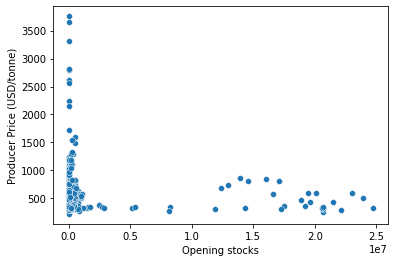

In [32]:
sns.scatterplot(x = df_pivot["Opening stocks"], y = df_pivot["Producer Price (USD/tonne)"])

<AxesSubplot:xlabel='Stock Variation', ylabel='Producer Price (USD/tonne)'>

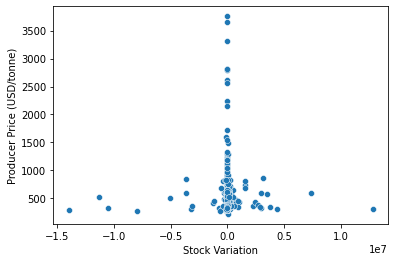

In [33]:
sns.scatterplot(x = df_pivot["Stock Variation"], y = df_pivot["Producer Price (USD/tonne)"])

<AxesSubplot:xlabel='Production', ylabel='Producer Price (USD/tonne)'>

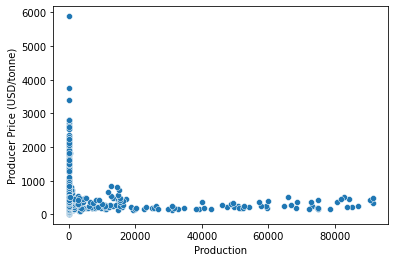

In [34]:
sns.scatterplot(x = df_pivot["Production"], y = df_pivot["Producer Price (USD/tonne)"])

<AxesSubplot:xlabel='Producer Price (USD/tonne)', ylabel='Stock Variation'>

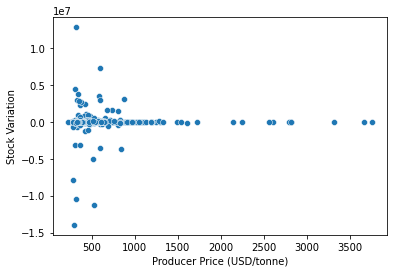

In [35]:
sns.scatterplot(x = df_pivot["Producer Price (USD/tonne)"], y = df_pivot["Stock Variation"])

In [36]:
df["Element"].unique()

array(['Producer Price (USD/tonne)', 'Production', 'Seed', 'Losses',
       'Processing', 'Food', 'Feed', 'Other uses (non-food)',
       'Stock Variation', 'Opening stocks'], dtype=object)

In [37]:
df[df['Element']=="Producer Price (USD/tonne)"]

,Area,Element,Year,Value,Unit
0,Albania,Producer Price (USD/tonne),1996,478.0,USD
1,Albania,Producer Price (USD/tonne),1997,336.0,USD
2,Albania,Producer Price (USD/tonne),1998,332.0,USD
3,Albania,Producer Price (USD/tonne),1999,436.0,USD
4,Albania,Producer Price (USD/tonne),2000,487.0,USD
...,...,...,...,...,...
1366,Zimbabwe,Producer Price (USD/tonne),2014,580.0,USD
1367,Zimbabwe,Producer Price (USD/tonne),2015,550.0,USD
1368,Zimbabwe,Producer Price (USD/tonne),2016,540.0,USD
1369,Zimbabwe,Producer Price (USD/tonne),2017,540.0,USD


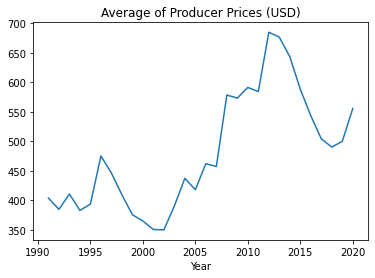

In [38]:
df[df['Element']=="Producer Price (USD/tonne)"].groupby("Year")["Value"].mean().plot()
data_prices = df[df['Element']=="Producer Price (USD/tonne)"].groupby("Year")["Value"].mean()
plt.title("Average of Producer Prices (USD)")
plt.show()

In [39]:
soy_prod_annual = df[df['Element']=="Production"].groupby("Year")["Value"].sum()

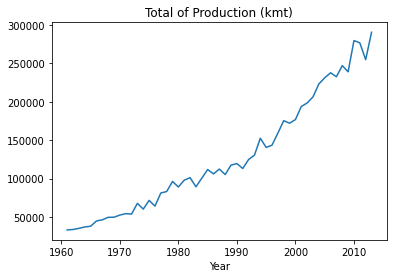

In [40]:
df[df['Element']=="Production"].groupby("Year")["Value"].sum().plot()
plt.title("Total of Production (kmt)")
plt.show()

In [41]:
# Consumption: 'Seed', 'Losses','Processing', 'Food', 'Feed', 'Other uses (non-food)'

consumption = df[(df['Element']== 'Seed') |
                 (df['Element']== 'Processing') |
                 (df['Element']== 'Food') |
                 (df['Element']== 'Feed') |
                 (df['Element']== 'Other uses (non-food)')]

consumption.groupby("Year")["Value_adj"].sum().plot()
plt.title("Total of Consumption (kmt)")
plt.show()

KeyError: 'Column not found: Value_adj'

In [ ]:
soy_cons_annual = consumption.groupby("Year")["Value_adj"].sum()

In [ ]:
plt.plot(soy_cons_annual, label = "Consumption")
plt.plot(soy_prod_annual, label = "Production")
#plt.plot(data_prices, label ="Avg Prices")
plt.legend();

In [ ]:
df["Factor"] = df["Element"]
df["Factor"] = df["Factor"].map({"Producer Price (USD/tonne)": 1, 'Production':1, 'Seed': -1, 'Losses':-1,
       'Processing':-1, 'Food':-1, 'Feed':-1, 'Other uses (non-food)':-1 })


In [ ]:
df.head()

In [ ]:
sns.scatterplot(x = data_prices, y=soy_prod_annual)